In [14]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

--2022-09-21 12:40:30--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.218.113, 173.194.218.100, 173.194.218.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0k60dg1grjt4cv1q9ta1ft06qi1mlgi9/1663764000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=acf4e7d9-d1b2-4cc0-8777-fe25d51a4400 [following]
--2022-09-21 12:40:33--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0k60dg1grjt4cv1q9ta1ft06qi1mlgi9/1663764000000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=acf4e7d9-d1b2-4cc0-8777-fe25d51a4400
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to d

In [15]:
import pandas as pd
data=pd.read_excel("台北房價.xlsx")
data.head()

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,文山區,房地(土地+建物),臺北市文山區萬美街二段2巷1~30號,65.80,住,NaN,NaN,1070317.0,土地1建物1車位0,四層,...,2.0,有,有,9800000.0,96723.0,NaN,0.0,0.0,NaN,RPOOMLOKNHNFFAA47CA
1,中正區,土地,南海段四小段91~120地號,45.00,其他,NaN,NaN,1070425.0,土地2建物0車位0,NaN,...,0.0,有,無,74460150.0,1654670.0,NaN,0.0,0.0,本案係屬於協議價購案件,RPROMLLKNHNFFAA47CA
2,中正區,土地,南海段四小段121~150地號,40.00,其他,NaN,NaN,1070425.0,土地1建物0車位0,NaN,...,0.0,有,無,33413920.0,835348.0,NaN,0.0,0.0,本案係屬於協議價購案件,RPSOMLLKNHNFFAA57CA
3,文山區,房地(土地+建物),臺北市文山區辛亥路七段84巷1~30號,19.17,住,NaN,NaN,1070311.0,土地2建物1車位0,四層,...,2.0,有,有,12080000.0,149357.0,NaN,0.0,0.0,含增建或未登記建物。,RPPOMLPKNHNFFAA67CA
4,文山區,房地(土地+建物),臺北市文山區羅斯福路六段39巷1~30號,16.33,商,NaN,NaN,1070408.0,土地2建物1車位0,三層,...,2.0,有,無,4009074.0,68020.0,NaN,0.0,0.0,親友、員工或其他特殊關係間之交易。,RPSOMLQKNHNFFAA08CA


#一、分析出台北107年各行政區交易筆數之差異。

In [32]:
f=data.groupby('鄉鎮市區')
frequence=f.size()
flist=pd.DataFrame(frequence,columns=['Frequence_鄉鎮市區'])
f=data.groupby('鄉鎮市區')
percentage=f.size()/len(data)
plist=pd.DataFrame(percentage,columns=['Percentage_鄉鎮市區'])
total=flist.merge(plist,on = '鄉鎮市區')
sorttotal=total.sort_values("Frequence_鄉鎮市區")
sorttotal

,Frequence_鄉鎮市區,Percentage_鄉鎮市區
鄉鎮市區,,
大同區,644,0.039393
南港區,666,0.040739
中正區,951,0.058172
信義區,1034,0.063249
松山區,1040,0.063616
萬華區,1273,0.077869
士林區,1373,0.083986
文山區,1564,0.095669
大安區,1614,0.098728


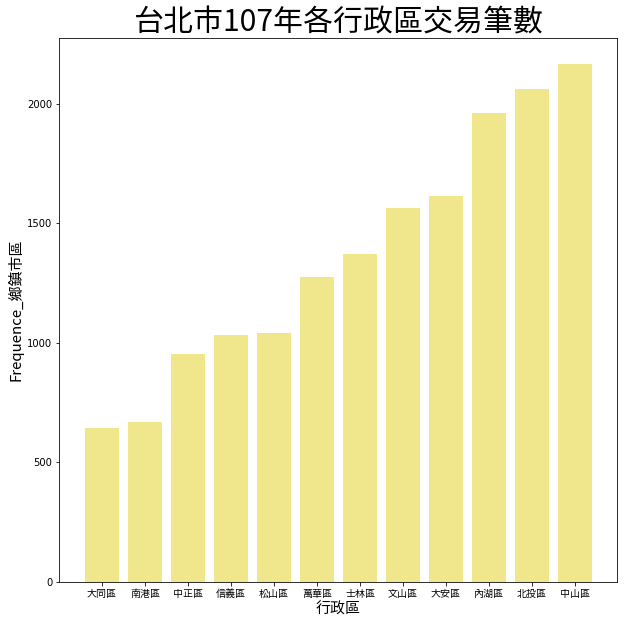

In [29]:
plt.rcParams['figure.figsize']=(10.0,10.0)
districts = sorttotal.index
amounts = sorttotal['Frequence_鄉鎮市區']
x = np.arange(len(districts))
plt.bar(x, amounts, color=['#F0E68C'])
plt.xticks(x, districts, fontproperties=myfont, fontsize=10)
plt.xlabel('行政區', fontproperties=myfont, fontsize=15)
plt.ylabel('Frequence_鄉鎮市區', fontproperties=myfont, fontsize=15)
plt.title('台北市107年各行政區交易筆數', fontproperties=myfont, fontsize=30)
plt.show()

#二、分析出台北107年房屋各行政區每平方公尺價格之差異。

In [18]:
a=data.groupby('鄉鎮市區').mean()[['單價元平方公尺']].sort_values(by=['單價元平方公尺'])
a=round(a,2)
a

,單價元平方公尺
鄉鎮市區,
北投區,121555.43
文山區,144972.03
萬華區,160620.38
南港區,167672.04
內湖區,173992.51
士林區,177246.24
大同區,183895.00
信義區,212075.75
松山區,212459.26


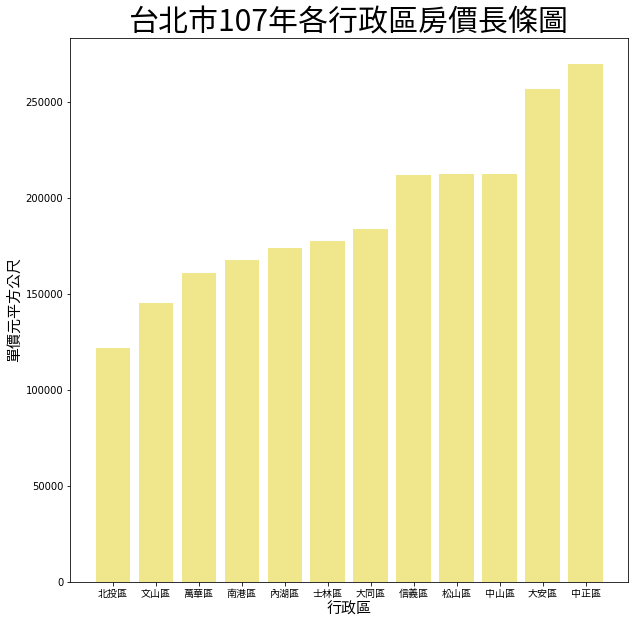

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(10.0,10.0)
districts = a.index
amounts = a['單價元平方公尺']
x = np.arange(len(districts))
plt.bar(x, amounts, color=['#F0E68C'])
plt.xticks(x, districts, fontproperties=myfont, fontsize=10)
plt.xlabel('行政區', fontproperties=myfont, fontsize=15)
plt.ylabel('單價元平方公尺', fontproperties=myfont, fontsize=15)
plt.title('台北市107年各行政區房價長條圖', fontproperties=myfont, fontsize=30)
plt.show()